<a href="https://colab.research.google.com/github/Diyorbek-MY/ML/blob/main/UNSUPERVISED_LEARNING_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✔️ klasterlash;

✔️ maʼlumotlarni normallashtirish;

✔️ klaster tahlili;

✔️ vizualizatsiya kabi real data sayns loyihalari uchun zarur texnik ko‘nikmalarga ega bo‘lasiz.

## **Dataset: Wholesale Customers Data**  
- **Manba:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  

### **Vazifa: mijozlarni xarajat turlariga qarab segmentlash**  
Maqsad – **mijozlarni xarajat qiladigan mahsulotlar bo‘yicha klasterlash va marketologlarga tavsiyalar berish**  

---

### **Klasterlash bosqichlari**  
1) **Maʼlumotlarni tayyorlash**  
   - `Channel` va `Region` ustunlarini olib tashlang yoki kodlang.  
   - Har bir xarajat ustunini **normalizatsiya qiling**.  

2) **K-means klasterlashni amalga oshirish**  
   - K-means yordamida mijozlarni **xarajat qilish odatlari** bo‘yicha segmentlarga ajrating.  

3) **Natijalarni vizualizatsiya qilish**  
   - **Pairplot yoki scatter plot** yordamida klasterlarni ko‘rsating.  
   - Har bir segmentning xarajatlar bo‘yicha o‘rtacha qiymatini diagrammada aks ettiring.



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
#javobni shu yerda yozing.

df_cleaned = df.drop(columns=["Channel", "Region"])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)
df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(scaled_data)

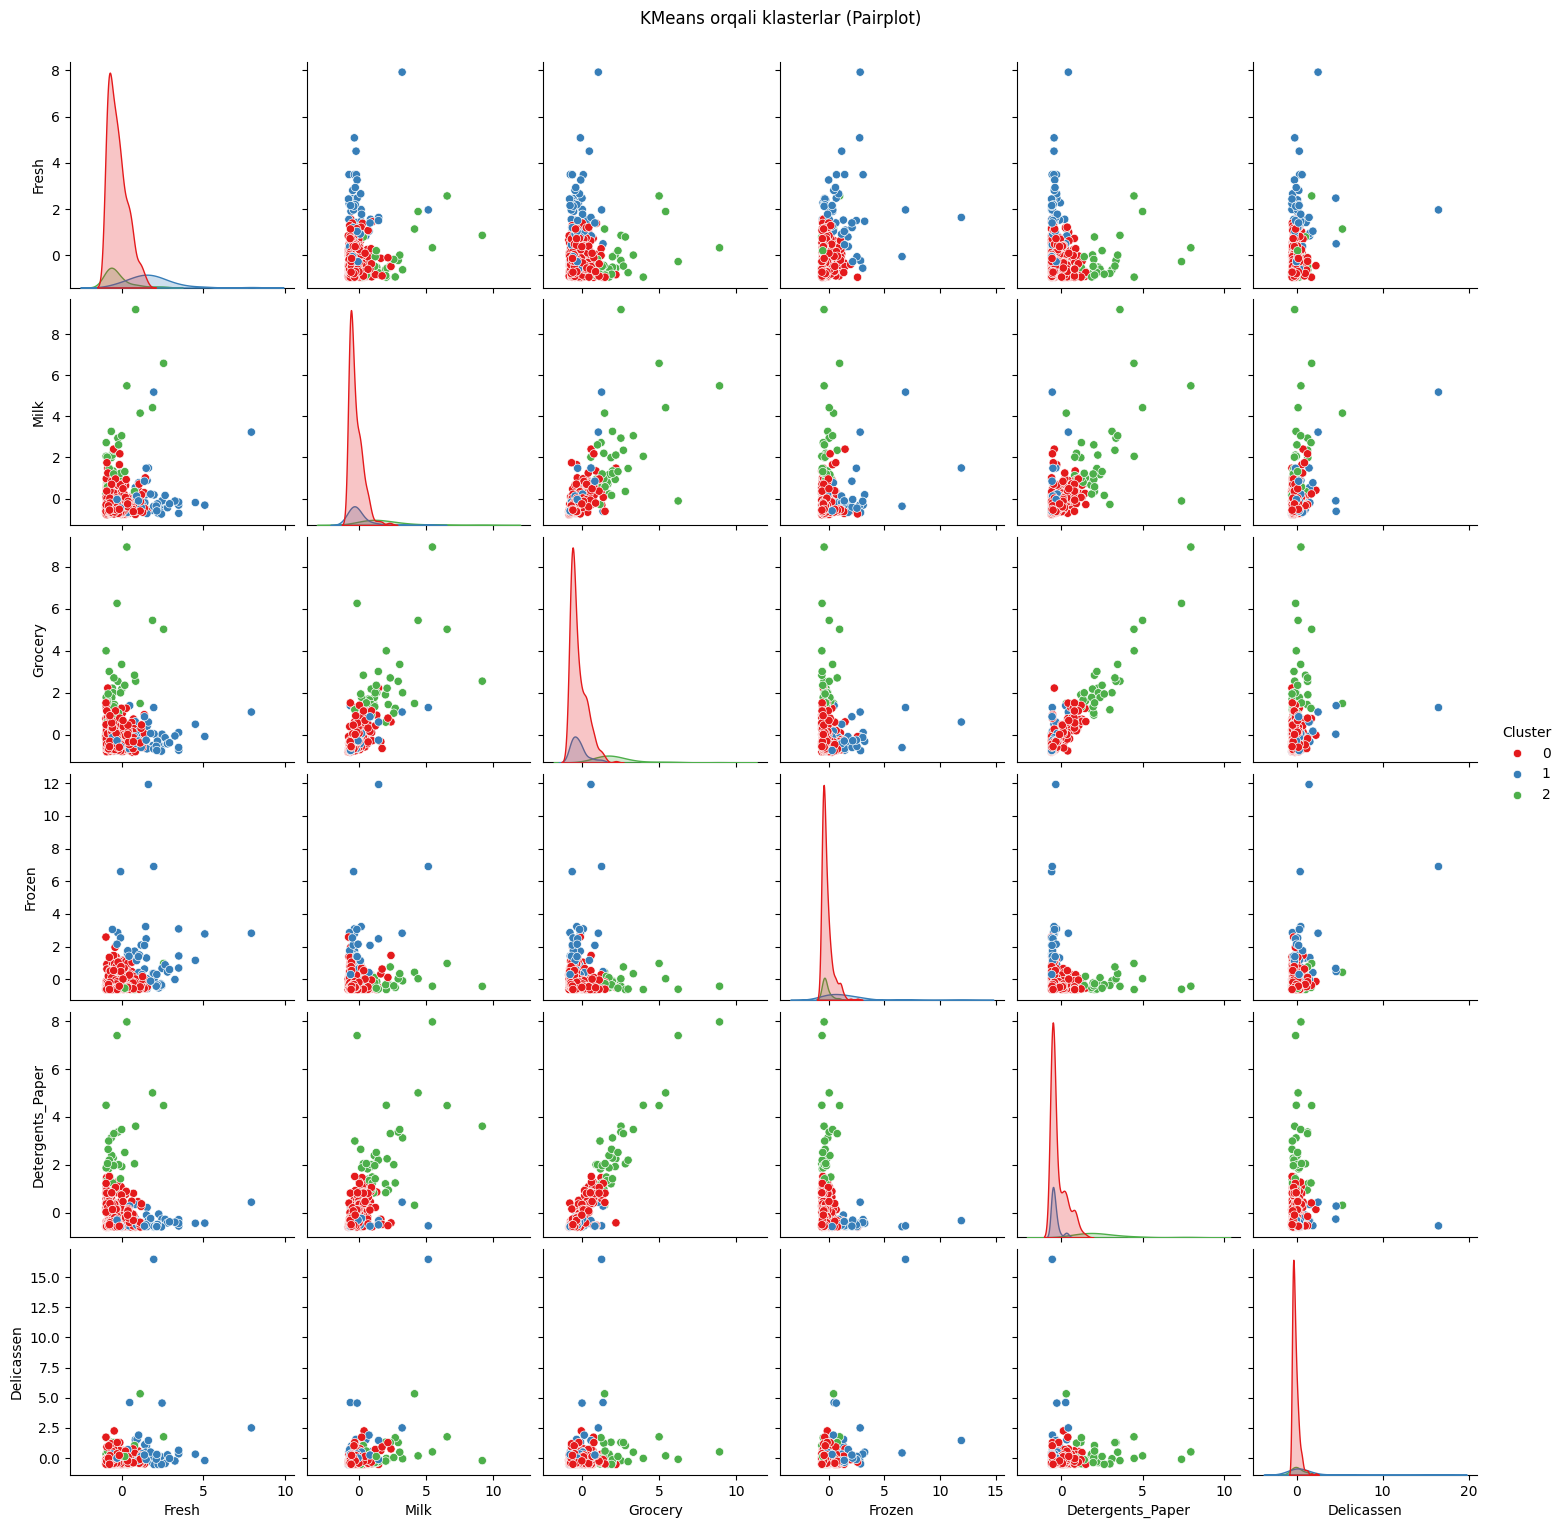

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df_scaled, hue="Cluster", palette="Set1")
plt.suptitle("KMeans orqali klasterlar (Pairplot)", y=1.02)
plt.show()

In [15]:
df_cleaned["Cluster"] = df_scaled["Cluster"]
cluster_means = df_cleaned.groupby("Cluster").mean()

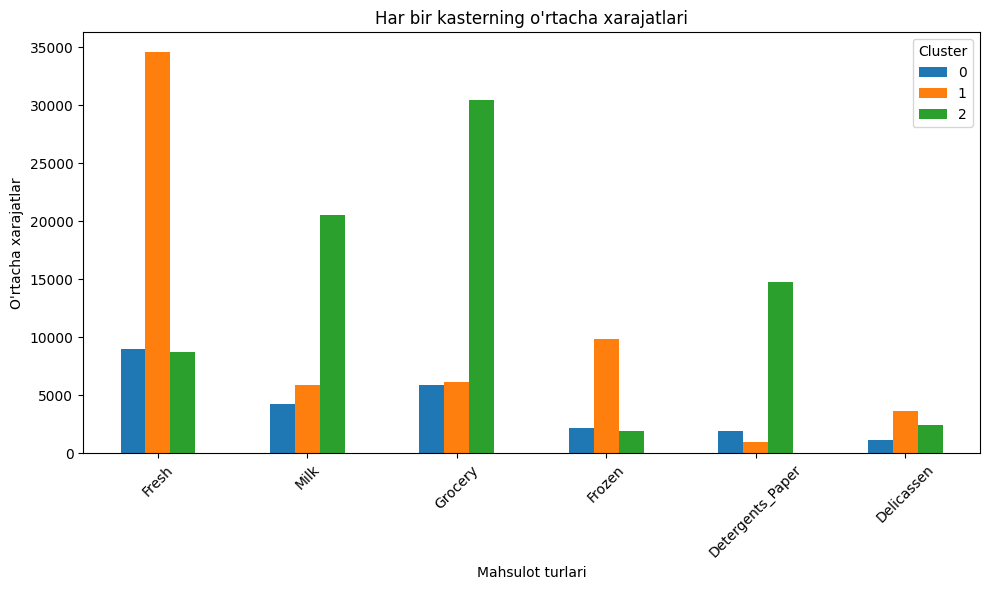

In [17]:
cluster_means.T.plot(kind="bar", figsize=(10,6))
plt.title("Har bir kasterning o'rtacha xarajatlari")
plt.ylabel("O'rtacha xarajatlar")
plt.xlabel("Mahsulot turlari")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()